In [1]:
# load library
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)

# load dataset
comics <- readr::read_csv("data/comics.csv")
head(comics)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Rows: 23272 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): name, id, align, eye, hair, gender, gsm, alive, first_appear, publ...
dbl  (1): appearances

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


In [6]:
table(comics$id, comics$align)

         
           Bad Good Neutral Reformed Criminals
  No Dual  474  647     390                  0
  Public  2172 2930     965                  1
  Secret  4493 2475     959                  1
  Unknown    7    0       2                  0

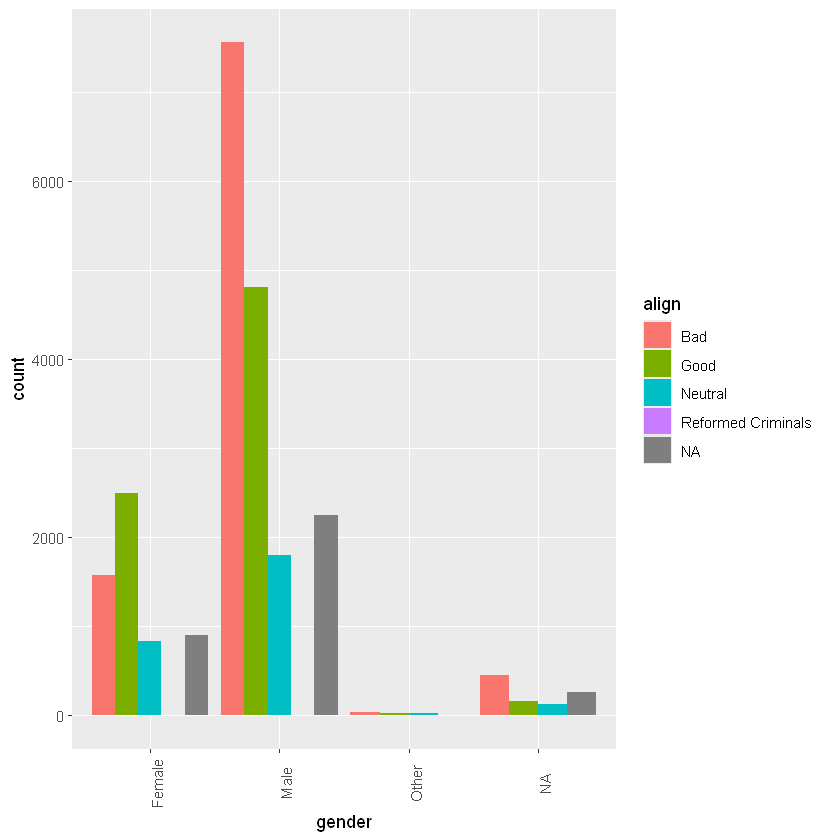

In [9]:
ggplot(comics, aes(x = gender, fill=align)) + 
    geom_bar(position = "dodge") + 
    theme(axis.text.x = element_text(angle = 90))

In [10]:
tab <- table(comics$align, comics$gender)
options(scipen = 999, digits = 3) # Print fewer digits
prop.table(tab)     # Joint proportions
prop.table(tab, 2)  # Conditional on columns

                    
                        Female      Male     Other
  Bad                0.0821968 0.3950985 0.0016722
  Good               0.1301144 0.2512933 0.0008883
  Neutral            0.0436850 0.0940064 0.0008883
  Reformed Criminals 0.0000523 0.0001045 0.0000000

                    
                       Female     Male    Other
  Bad                0.321020 0.533554 0.484848
  Good               0.508163 0.339355 0.257576
  Neutral            0.170612 0.126949 0.257576
  Reformed Criminals 0.000204 0.000141 0.000000

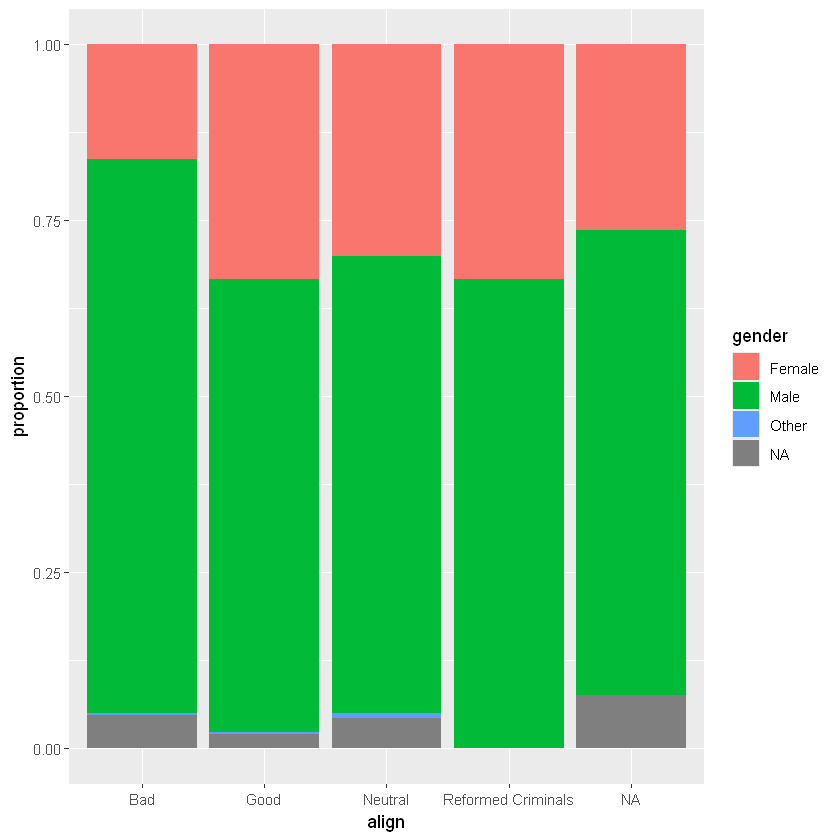

In [11]:
ggplot(comics, aes(align, fill = gender)) +
    geom_bar(position = "fill") +
    ylab("proportion")